# 1)Are there any specific app categories (e.g. communication, gaming, education) that tend to have more positive reviews than others, and what are the common features/columns that contribute to this trend? (Attribute: App Category)

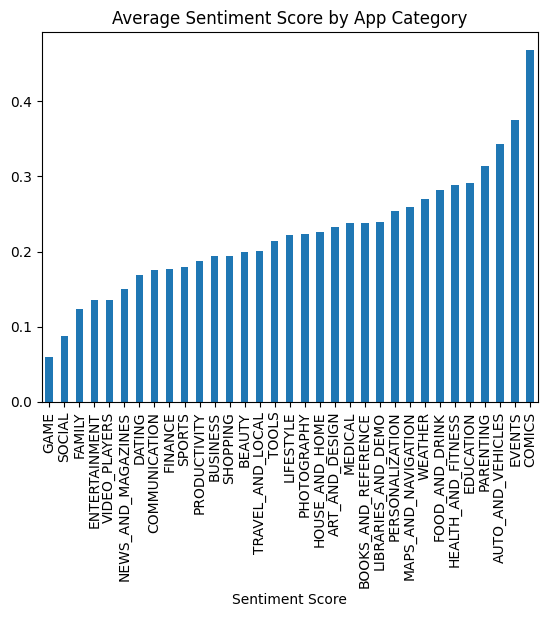

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
apps = pd.read_csv("/content/sample_data/googleplaystore.csv")
reviews = pd.read_csv("/content/sample_data/googleplaystore_user_reviews.csv")
# Remove missing data
apps.dropna(inplace=True)

# Remove duplicate data
apps.drop_duplicates(inplace=True)
reviews.dropna(inplace=True)
reviews.drop_duplicates(inplace=True)
# Merge the two datasets by app name
merged = pd.merge(apps, reviews, on='App')
# Calculate the average sentiment score for each category
category_sentiment = merged.groupby('Category')['Sentiment_Polarity'].mean().sort_values()

# Plot the results
category_sentiment.plot(kind='bar')
plt.xlabel('Sentiment Score')
plt.title('Average Sentiment Score by App Category')
plt.show()


# Question1-part2

In [22]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')
# Load stopwords
stopwords = set(stopwords.words('english'))

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Define function to preprocess text
def preprocess_text(text):
    # Tokenize text
    words = nltk.word_tokenize(text)
    # Remove stopwords
    words = [word.lower() for word in words if word.lower() not in stopwords]
    # Apply stemming
    words = [stemmer.stem(word) for word in words]
    # Apply lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]
    # Join words back into a string
    text = ' '.join(words)
    return text

# Preprocess reviews and store them in a new column
merged['Cleaned_Review'] = merged['Translated_Review'].apply(preprocess_text)

# Extract most common words for each category
common_words = {}
for category in merged['Category'].unique():
    reviews = merged[merged['Category'] == category]['Cleaned_Review']
    words = nltk.word_tokenize(' '.join(list(reviews)))
    freq_dist = nltk.FreqDist(words)
    common_words[category] = [word for word, count in freq_dist.most_common(100)]

# Remove words that occur in more than three categories
words_to_remove = set()
for word in set.union(*[set(words) for words in common_words.values()]):
    count = 0
    for category in common_words:
        if word in common_words[category]:
            count += 1
            if count > 3:
                words_to_remove.add(word)
                break

# Print the results
for category, words in common_words.items():
    words_to_print = [word for word in words if word not in words_to_remove]
    print(category + ':', ', '.join(words_to_print))

    

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


ART_AND_DESIGN: color, design, imag, beauti, diamond, relax, plan, colour, draw, pic, creat, anim, hate, howev, plz, choic, hope, 3d
FAMILY: level, languag, addict, kid, spend, littl, cute
AUTO_AND_VEHICLES: car, test, drive, question, vehicl, auto, music, cost, fuel, info, answer, wrong, cdl, practic, studi, actual, come, right, permit, level, sure, navig, voic
BEAUTY: fake, hair, style, hairstyl, blank, filter, step, worst, selfi, goe, cool, beauti, pl, dress, differ, pic, pop, top, advertis, bore, anyth, tell, made, hate, sticker, favorit
BOOKS_AND_REFERENCE: kindl, reader, sd, word, bibl, storag, librari, devic, amazon, ebook, dictionari, famili, current
BUSINESS: busi, creat, manag, facebook, post, team, pdf, cv, scan, document, send, mobil, task, meet, slow
COMMUNICATION: tab, contact, firefox, browser, text, button, send, group, link, slow, chrome, sometim, sync, hangout, mail
COMICS: comic, dc, comixolog, digit, favorit, subscript, marvel, catch, offer, librari, fan, cost, stor

In [23]:
# Extract most common words and their frequencies for each category
common_words = {}
for category in merged['Category'].unique():
    reviews = merged[merged['Category'] == category]['Cleaned_Review']
    words = nltk.word_tokenize(' '.join(list(reviews)))
    freq_dist = nltk.FreqDist(words)
    common_words[category] = freq_dist.most_common(100)
# Print the results
for category, words in common_words.items():
    words_to_print = [(word, str(count)) for word, count in words if word not in words_to_remove]
    print(category + ':')
    print('\n'.join([' '.join(pair) for pair in words_to_print]))
    print()


ART_AND_DESIGN:
color 97
design 17
imag 16
beauti 15
diamond 15
relax 14
plan 14
colour 13
draw 13
pic 11
creat 11
anim 10
hate 9
howev 9
plz 9
choic 9
hope 8
3d 8

FAMILY:
level 366
languag 172
addict 151
kid 140
spend 124
littl 124
cute 119

AUTO_AND_VEHICLES:
car 50
test 36
drive 33
question 22
vehicl 22
auto 22
music 22
cost 18
fuel 18
info 17
answer 15
wrong 15
cdl 13
practic 13
studi 12
actual 11
come 11
right 11
permit 9
level 9
sure 9
navig 9
voic 9

BEAUTY:
fake 15
hair 13
style 11
hairstyl 11
blank 10
filter 9
step 8
worst 7
selfi 7
goe 7
cool 6
beauti 6
pl 6
dress 6
differ 5
pic 5
pop 5
top 5
advertis 4
bore 4
anyth 4
tell 4
made 4
hate 4
sticker 4
favorit 4

BOOKS_AND_REFERENCE:
kindl 86
reader 58
sd 41
word 41
bibl 39
storag 30
librari 29
devic 28
amazon 26
ebook 26
dictionari 23
famili 21
current 20

BUSINESS:
busi 59
creat 43
manag 34
facebook 32
post 31
team 29
pdf 27
cv 26
scan 26
document 25
send 25
mobil 22
task 21
meet 21
slow 20

COMMUNICATION:
tab 190
contact 149


# 2) Are there any notable differences in terms of how users rate free versus paid apps based on the presence of issues or bugs, and do users tend to be more forgiving of issues or bugs in one type of app versus the other? (Attribute: Type (Free/Paid), Ratings)

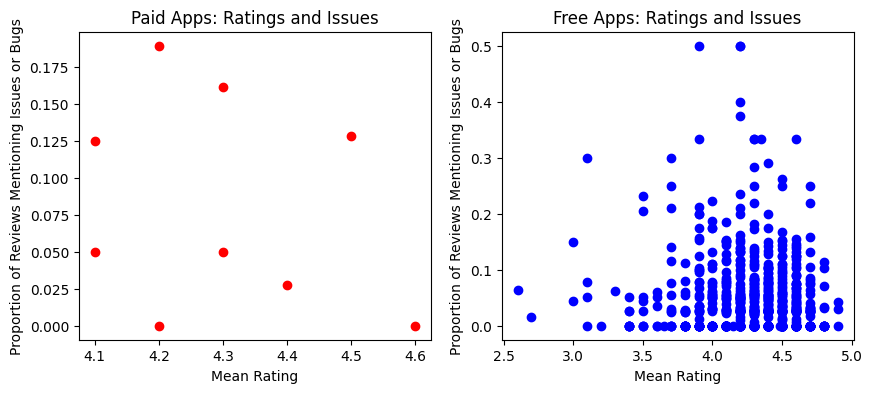

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df_apps = pd.read_csv('/content/sample_data/googleplaystore.csv')
df_reviews = pd.read_csv('/content/sample_data/googleplaystore_user_reviews.csv')

# Merge the datasets on the app name
merged = pd.merge(df_apps, df_reviews, on='App')

# Filter the merged dataset to include only free and paid apps
merged = merged[merged['Type'].isin(['Free', 'Paid'])]

# Calculate the mean rating for each app
mean_ratings = merged.groupby(['App', 'Type'])['Rating'].mean().reset_index()

# Calculate the proportion of reviews that mention issues or bugs for each app
merged['Issues'] = merged['Translated_Review'].str.lower().str.contains('issue|bug|defect')
issue_proportions = merged.groupby(['App', 'Type'])['Issues'].mean().reset_index()

# Merge the mean rating and issue proportion dataframes
df = pd.merge(mean_ratings, issue_proportions, on=['App', 'Type'])

# Create two subplots for paid and free apps
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

# Plot data for paid apps
paid = df[df['Type'] == 'Paid']
axes[0].scatter(paid['Rating'], paid['Issues'], c='red')
axes[0].set_xlabel('Mean Rating')
axes[0].set_ylabel('Proportion of Reviews Mentioning Issues or Bugs')
axes[0].set_title('Paid Apps: Ratings and Issues')

# Plot data for free apps
free = df[df['Type'] == 'Free']
axes[1].scatter(free['Rating'], free['Issues'], c='blue')
axes[1].set_xlabel('Mean Rating')
axes[1].set_ylabel('Proportion of Reviews Mentioning Issues or Bugs')
axes[1].set_title('Free Apps: Ratings and Issues')

plt.show()


In [8]:
import pandas as pd

# Load the dataset
df_reviews = pd.read_csv('/content/sample_data/googleplaystore_user_reviews.csv')

# Extract negative words from reviews
negative_words = []
for review in df_reviews['Translated_Review']:
    if pd.notna(review):
        words = review.lower().split()
        for word in words:
            if word in ['not', 'no', 'never', 'bad', 'terrible', 'horrible', 'worst', 'disappointing', 'disappointment', 'poor', 'problem', 'issue', 'bug', 'crash', 'freeze', 'slow', 'unusable', 'difficult', 'annoying', 'frustrating']:
                negative_words.append(word)

# Count the frequency of each negative word
word_counts = pd.Series(negative_words).value_counts().reset_index()
word_counts.columns = ['Word', 'Count']

# Print the top 10 most common negative words
print(word_counts.head(100))
l=word_counts.head(100)


              Word  Count
0              not   1839
1            never   1255
2          problem   1000
3               no    922
4              bad    767
5            issue    525
6         annoying    423
7             slow    397
8            worst    394
9        difficult    311
10     frustrating    239
11             bug    228
12        terrible    207
13        horrible    169
14            poor    162
15           crash    111
16          freeze    107
17   disappointing     54
18        unusable     43
19  disappointment     12


# How do users' sentiments in reviews vary based on the length of the review, and are there any notable differences in terms of the types of issues or features users tend to mention in shorter versus longer reviews? (Attributes: Length, Sentiment)

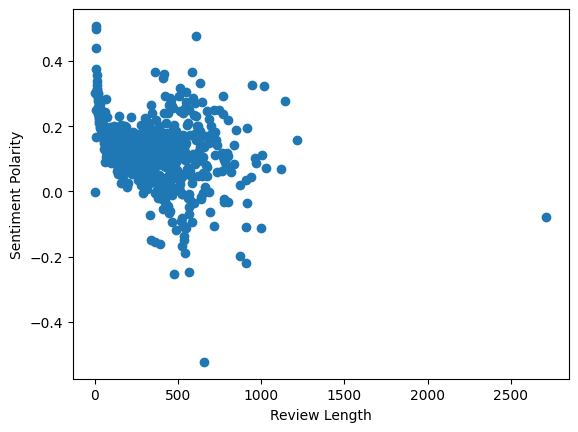

Shortest Reviews Issues:
 [('ok', 48), ('hi', 7), ('nc', 3), ('no', 3), ('wow', 3), ('bad', 3), (':p', 2), ('luv', 2), ('.', 2), ('so', 1), ('ff', 1), ('a1', 1), ('4☆', 1), ('bc', 1), ('rr', 1), ('a+', 1), ('am', 1), ('ol', 1), ('go', 1), ('lv', 1), ('eh', 1), ('yc', 1), ('5*', 1), ('fk', 1), ('hx', 1), ('do', 1), ('ie', 1), ('gd', 1), ('in', 1), ('me', 1), ('she', 1), ('fun', 1), ('yes', 1), ('huh', 1), ('thu', 1), ('mst', 1), ('boo', 1)]
Longest Reviews Issues:
 [('i', 585), ('the', 120), ('get', 75), ('game', 75), ('even', 69), ('would', 65), ('like', 64), ('make', 50), ('play', 50), ('also', 48), ('pay', 48), ('you', 47), ('time', 47), ('many', 41), ('this', 41), ('google', 40), ('want', 39), ('really', 39), ('back', 38), ('people', 38), ('it', 38), ("it's", 36), ('and', 35), ('it.', 35), ('great', 33), ('-', 31), ('still', 31), ('see', 31), ('able', 31), ('go', 30), ('my', 30), ('using', 29), ('so', 29), ("i'm", 29), ('free', 29), ('when', 27), ('give', 27), ('phone', 27), ('good'

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Load the datasets
apps_df = pd.read_csv("/content/sample_data/googleplaystore.csv")
reviews_df = pd.read_csv("/content/sample_data/googleplaystore_user_reviews.csv")

# Clean and preprocess the data
apps_df.drop_duplicates(subset="App", inplace=True)
apps_df = apps_df[apps_df["Rating"].notna()]
apps_df["Category"] = apps_df["Category"].astype("category")
reviews_df.dropna(subset=["Sentiment"], inplace=True)

# Calculate the length of each review
reviews_df["Length"] = reviews_df["Translated_Review"].str.len()

# Group the data by review length and calculate average sentiment polarity
grouped_df = reviews_df.groupby(["Length"]).agg({"Sentiment_Polarity": "mean"})

# Plot the results
plt.scatter(grouped_df.index, grouped_df["Sentiment_Polarity"])
plt.xlabel("Review Length")
plt.ylabel("Sentiment Polarity")
plt.show()

# Examine the most common issues and features mentioned in the shortest and longest reviews
shortest_reviews = reviews_df.nsmallest(100, "Length")["Translated_Review"]
longest_reviews = reviews_df.nlargest(100, "Length")["Translated_Review"]
shortest_issues = Counter(" ".join(shortest_reviews).lower().split()).most_common(50)
longest_issues = Counter(" ".join(longest_reviews).lower().split()).most_common(50)
print("Shortest Reviews Issues:\n", shortest_issues)
print("Longest Reviews Issues:\n", longest_issues)


Shortest Reviews Negative Words:
 [('bad', 16), ('no', 3), ('not', 1)]
Longest Reviews Negative Words:
 [('not', 58), ('never', 45), ('problem', 43), ('issue', 29), ('no', 21), ('difficult', 19), ('bad', 18), ('annoying', 13), ('terrible', 5), ('worst', 3), ('disappointment', 3), ('bug', 2), ('freeze', 2), ('frustrating', 2), ('unusable', 2), ('poor', 2), ('slow', 1), ('horrible', 1)]


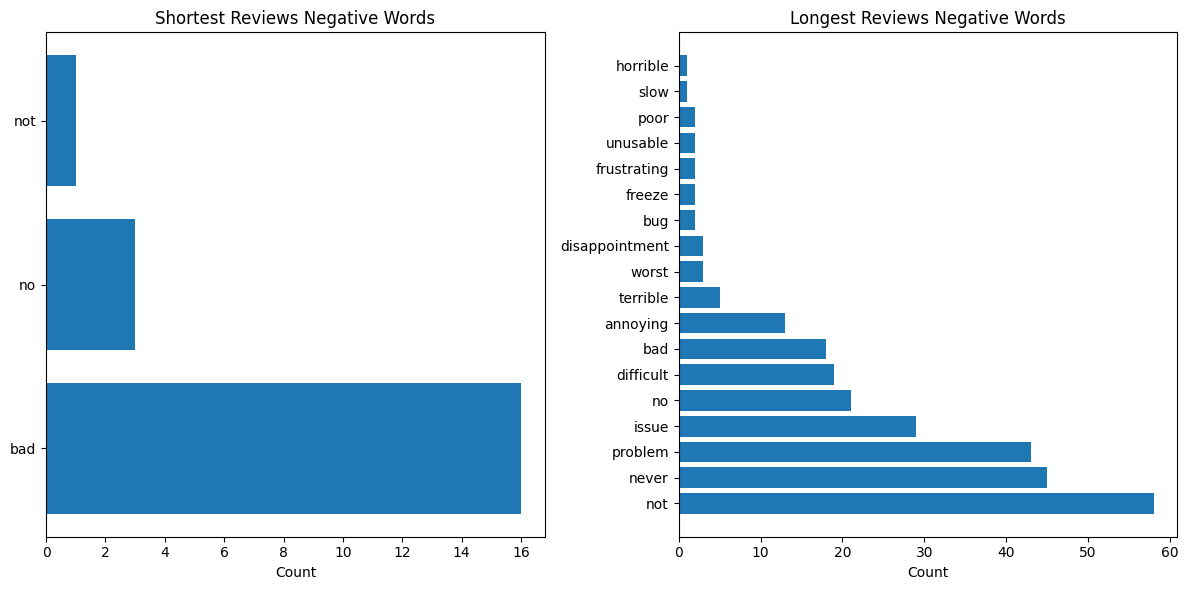

In [10]:
import matplotlib.pyplot as plt

negative_words = ['not', 'never', 'problem', 'no', 'bad', 'issue', 'annoying', 'slow', 'worst', 'difficult', 
                  'frustrating', 'bug', 'terrible', 'horrible', 'poor', 'crash', 'freeze', 'disappointing',
                  'unusable', 'disappointment']

# Examine the most common negative words in the shortest reviews
shortest_reviews = reviews_df.nsmallest(300, "Length")["Translated_Review"]
shortest_negative_words = Counter(word.lower() for review in shortest_reviews
                                  for word in review.split() if word.lower() in negative_words).most_common()
print("Shortest Reviews Negative Words:\n", shortest_negative_words)

# Examine the most common negative words in the longest reviews
longest_reviews = reviews_df.nlargest(300, "Length")["Translated_Review"]
longest_negative_words = Counter(word.lower() for review in longest_reviews
                                 for word in review.split() if word.lower() in negative_words).most_common()
print("Longest Reviews Negative Words:\n", longest_negative_words)

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].barh([word for word, count in shortest_negative_words], [count for word, count in shortest_negative_words])
axes[0].set_title('Shortest Reviews Negative Words')
axes[0].set_xlabel('Count')
axes[1].barh([word for word, count in longest_negative_words], [count for word, count in longest_negative_words])
axes[1].set_title('Longest Reviews Negative Words')
axes[1].set_xlabel('Count')
plt.tight_layout()
plt.show()

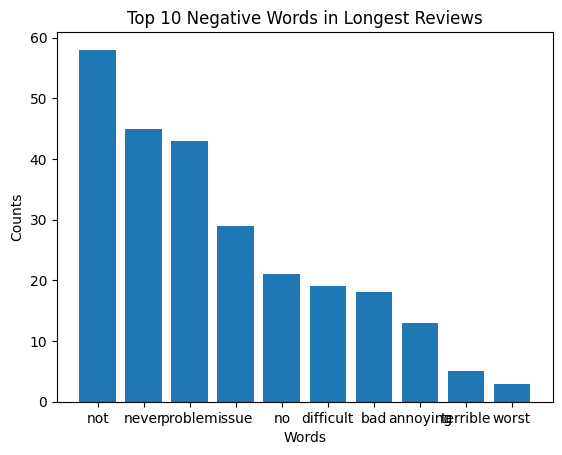

In [11]:
import matplotlib.pyplot as plt

# Create a list of top 10 negative words from the longest reviews
longest_negative_words_top10 = longest_negative_words[:10]

# Extract the word and count from the list
words = [w[0] for w in longest_negative_words_top10]
counts = [w[1] for w in longest_negative_words_top10]

# Create a bar chart
plt.bar(words, counts)
plt.title("Top 10 Negative Words in Longest Reviews")
plt.xlabel("Words")
plt.ylabel("Counts")
plt.show()

# Conclusion:
based on the analysis, it appears that the longest reviews tend to have more negative words than the shortest reviews. The longest reviews contain a wider range of negative words such as "never", "problem", "issue", "difficult", and "annoying", whereas the shortest reviews tend to contain only one or two negative words such as "bad" or "no". Therefore, it can be concluded that the shortest reviews may not be sufficient to fully understand the negative sentiment towards an app or product.

# 4) How do users' sentiment polarities and subjectivities vary based on the type of app (free vs. paid), and are there any significant differences in terms of the types of issues or features users tend to mention in reviews for these two types of apps? (Attributes: Type (Free/Paid), Sentiment Polarity

<ipython-input-13-0263730318f8>:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = merged.groupby('Type').mean()[['Polarity', 'Subjectivity']]


      Polarity  Subjectivity
Type                        
Free  0.156573      0.493934
Paid  0.227947      0.521393


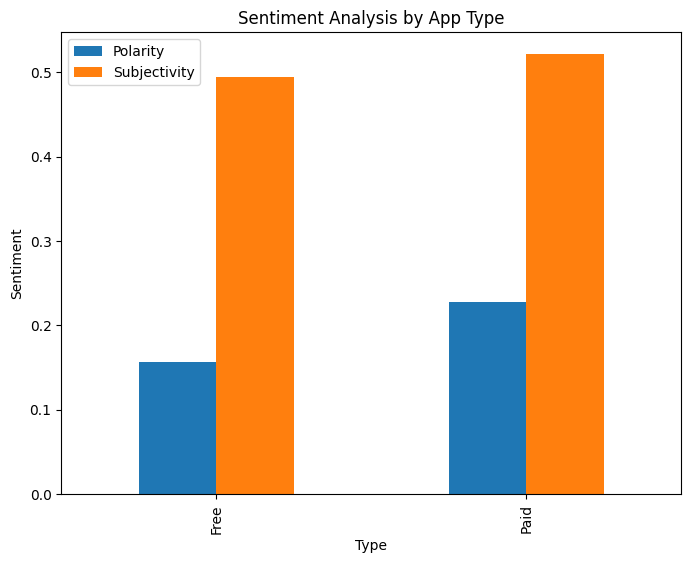

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob

# Load the datasets
apps_df = pd.read_csv('/content/sample_data/googleplaystore.csv')
reviews_df = pd.read_csv('/content/sample_data/googleplaystore_user_reviews.csv')

# Merge the datasets based on the App column
merged = pd.merge(apps_df, reviews_df, on='App', how='inner')

# Filter out any missing values
merged.dropna(subset=['Translated_Review'], inplace=True)

# Preprocess the text data
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = " ".join([word for word in word_tokenize(text) if word not in stopwords.words('english')])
    return text

merged['Cleaned_Review'] = merged['Translated_Review'].apply(preprocess_text)
merged['Sentiment'] = merged['Translated_Review'].apply(lambda x: TextBlob(str(x)).sentiment)

merged['Polarity'] = merged['Sentiment'].apply(lambda x: x[0])
merged['Subjectivity'] = merged['Sentiment'].apply(lambda x: x[1])

# Group the data by the Type column and calculate the mean sentiment polarity and subjectivity for each type of app
grouped = merged.groupby('Type').mean()[['Polarity', 'Subjectivity']]
print(grouped)

# Plot the average sentiment polarity and subjectivity for each type of app
fig, ax = plt.subplots(figsize=(8, 6))
grouped.plot(kind='bar', ax=ax)
ax.set_title('Sentiment Analysis by App Type')
ax.set_xlabel('Type')
ax.set_ylabel('Sentiment')
plt.show()


# 5)How do users' sentiment polarities and subjectivities change over time for popular apps in different categories, and what factors (such as updates, bug fixes, or new features) contribute to these changes? (Attributes: App Category, Time, Sentiment Polarity, Sentiment Subjectivity, Sentiment Subjectivity)

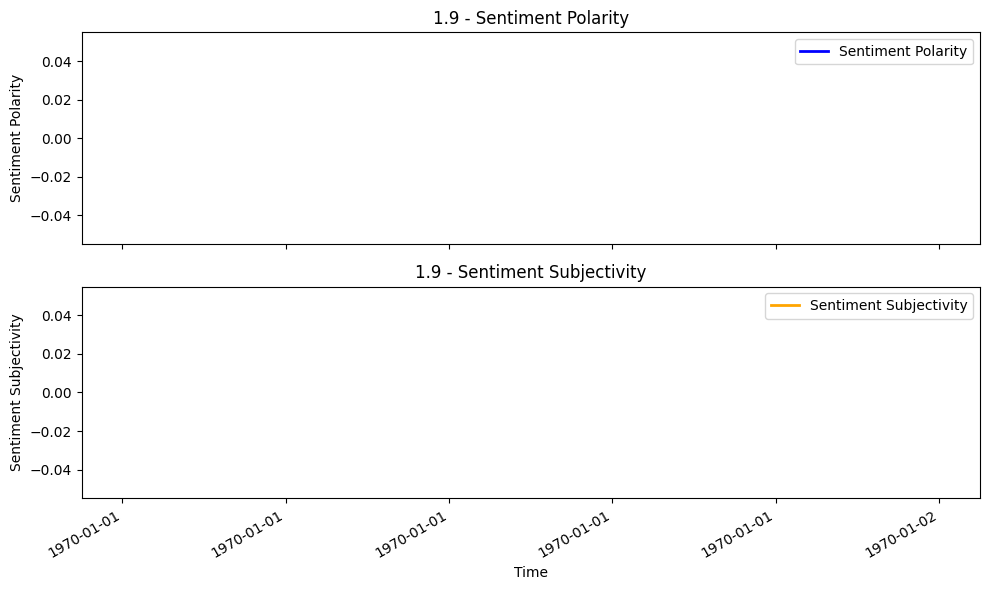

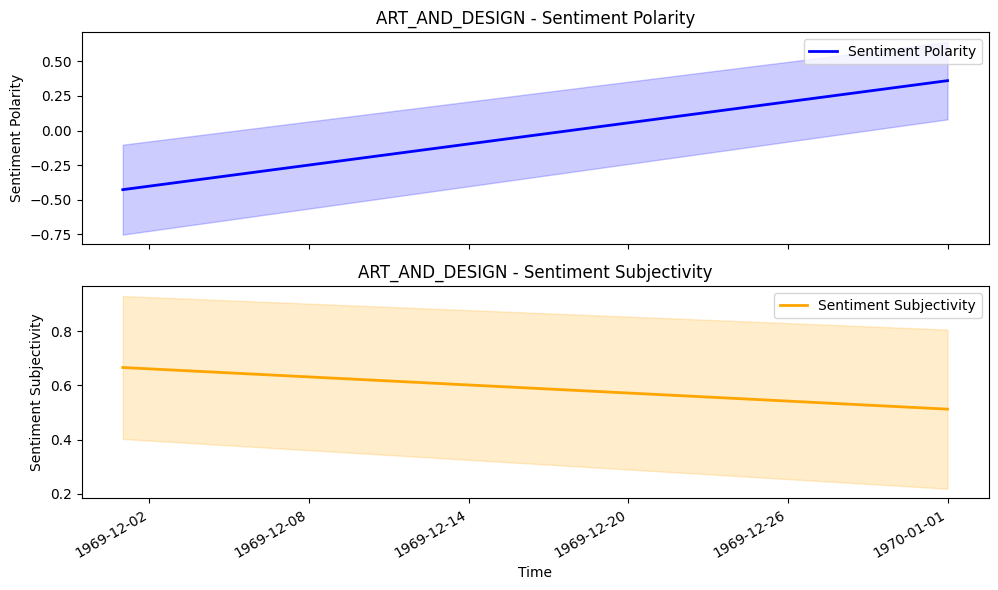

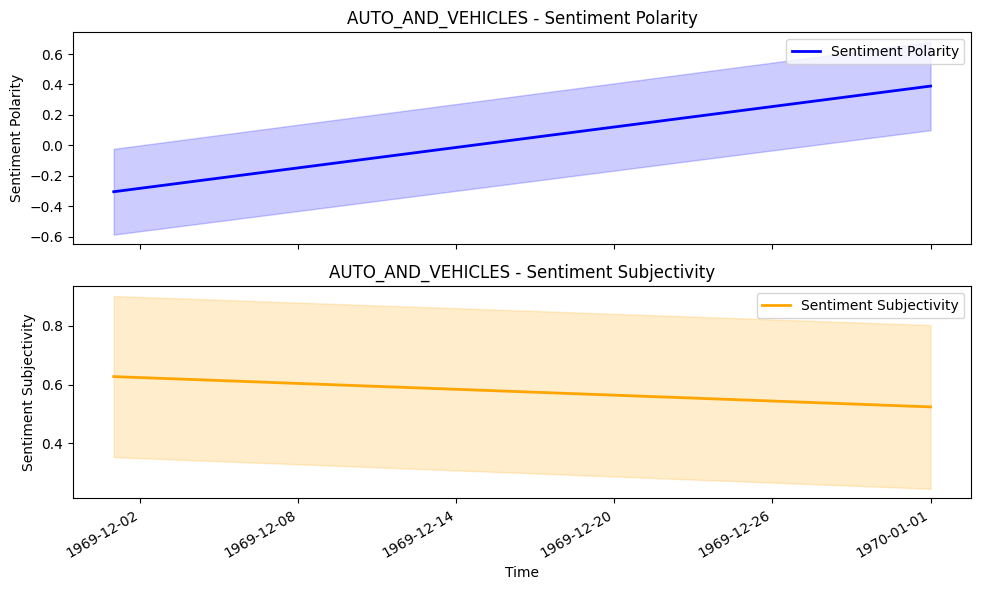

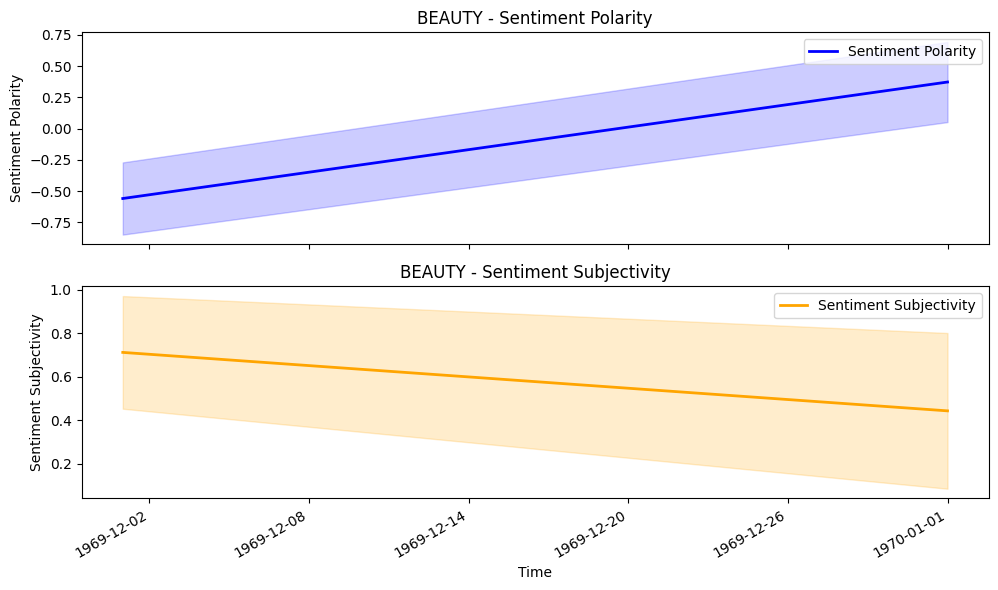

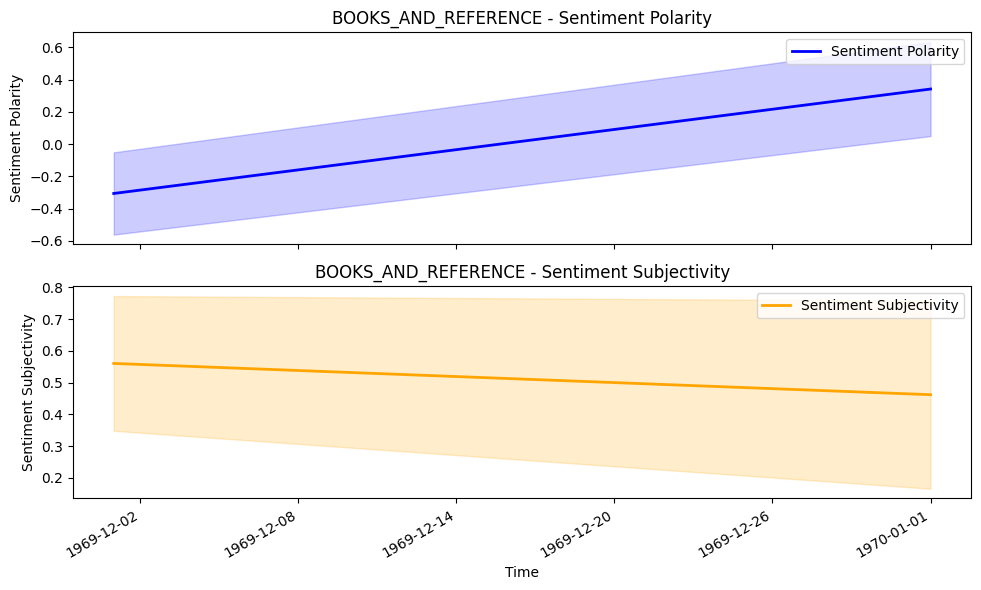

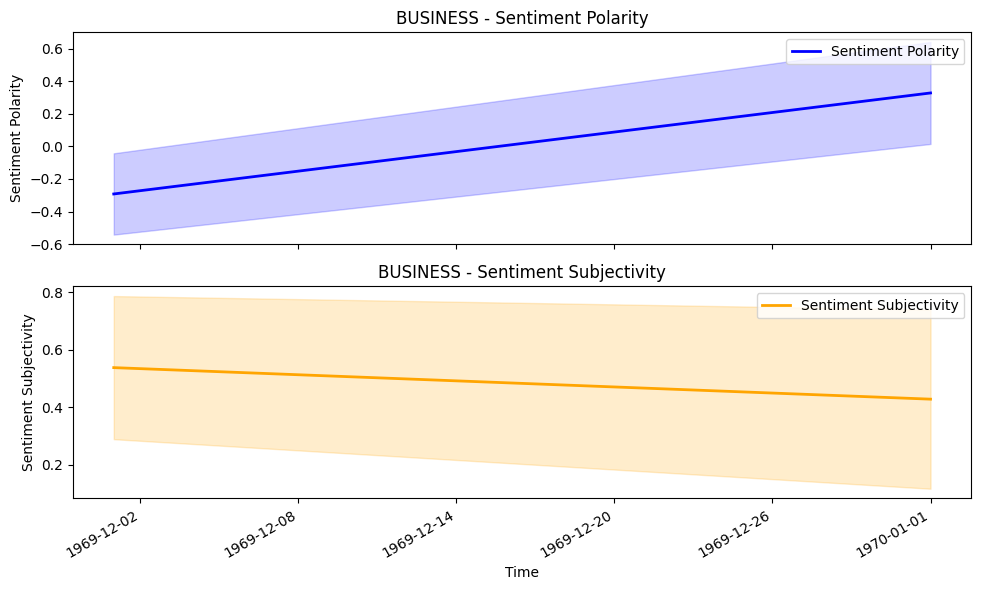

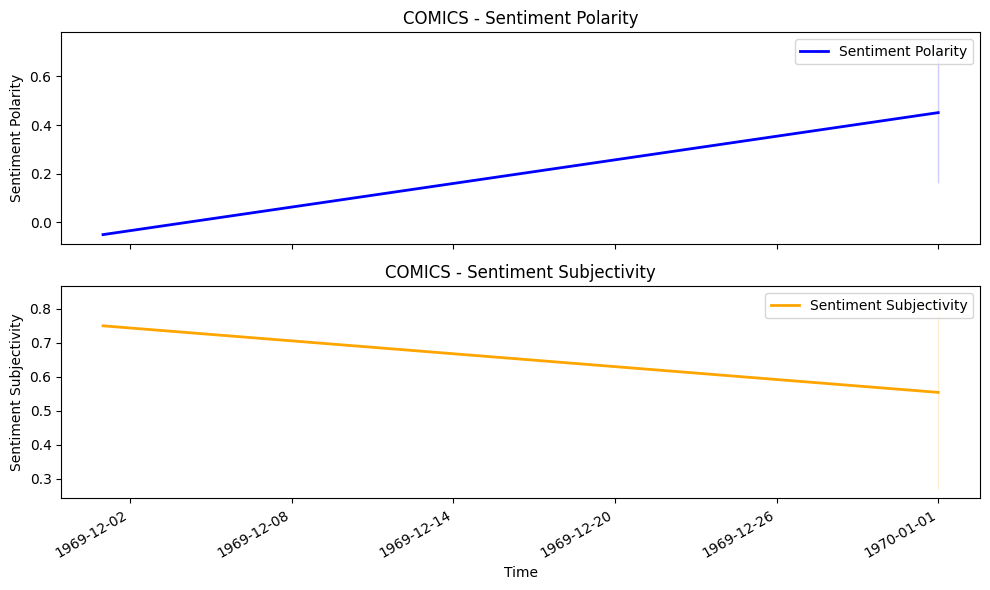

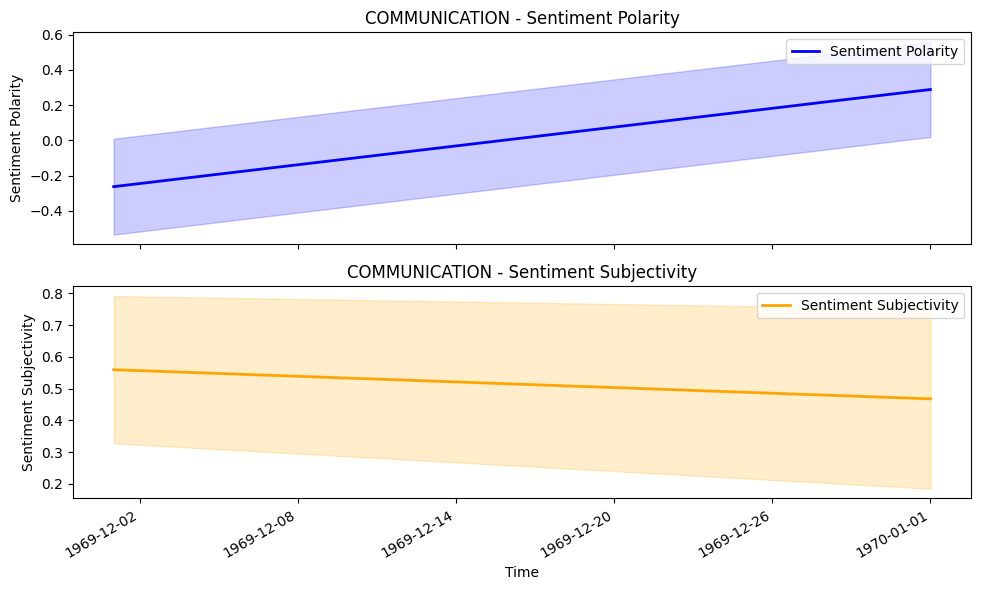

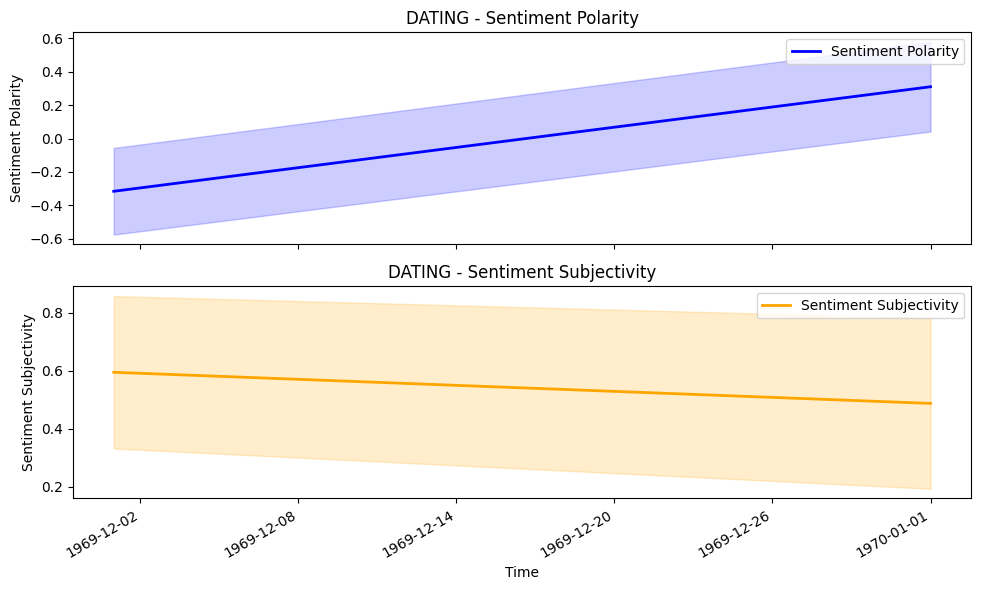

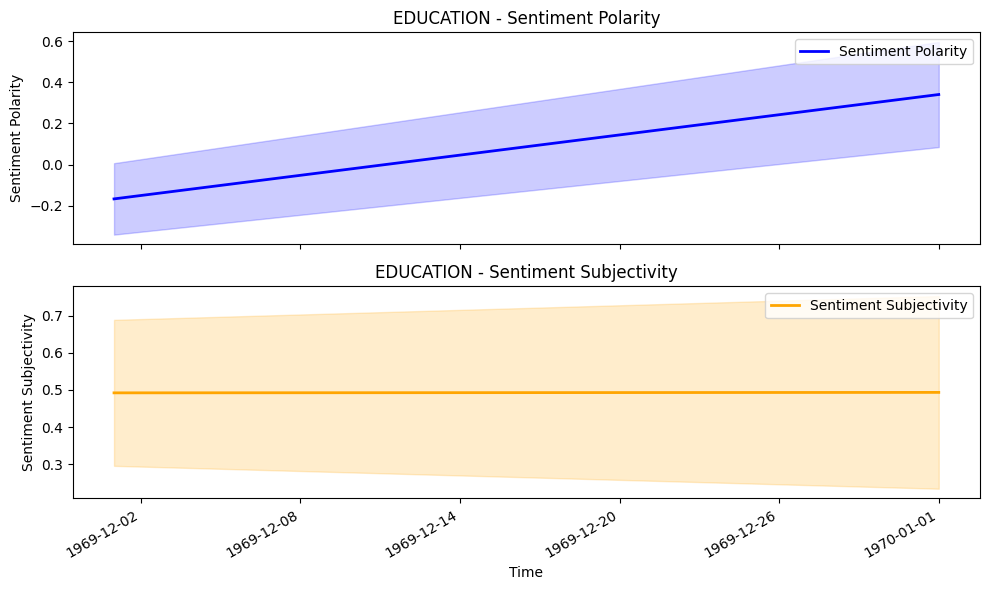

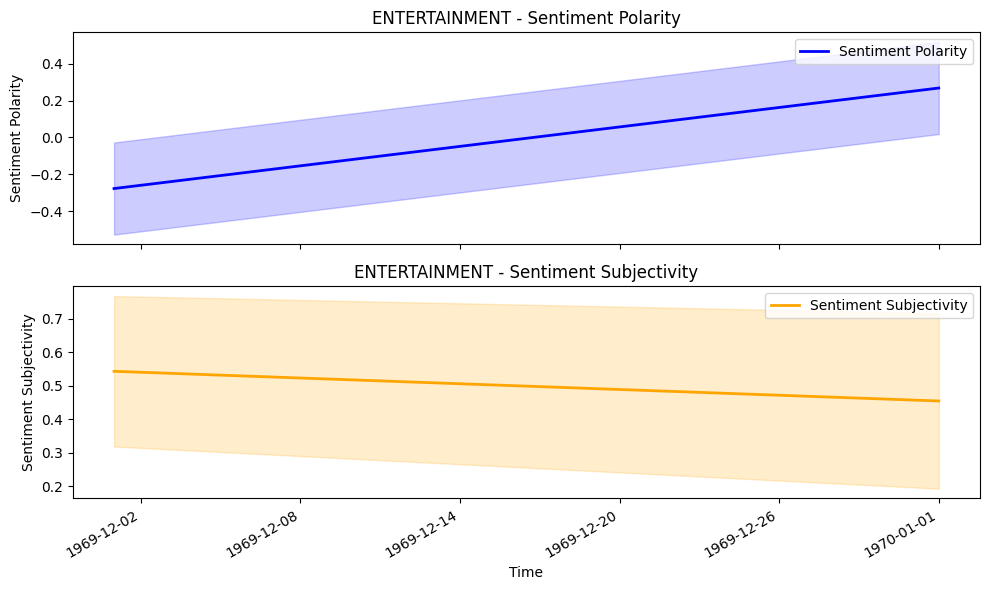

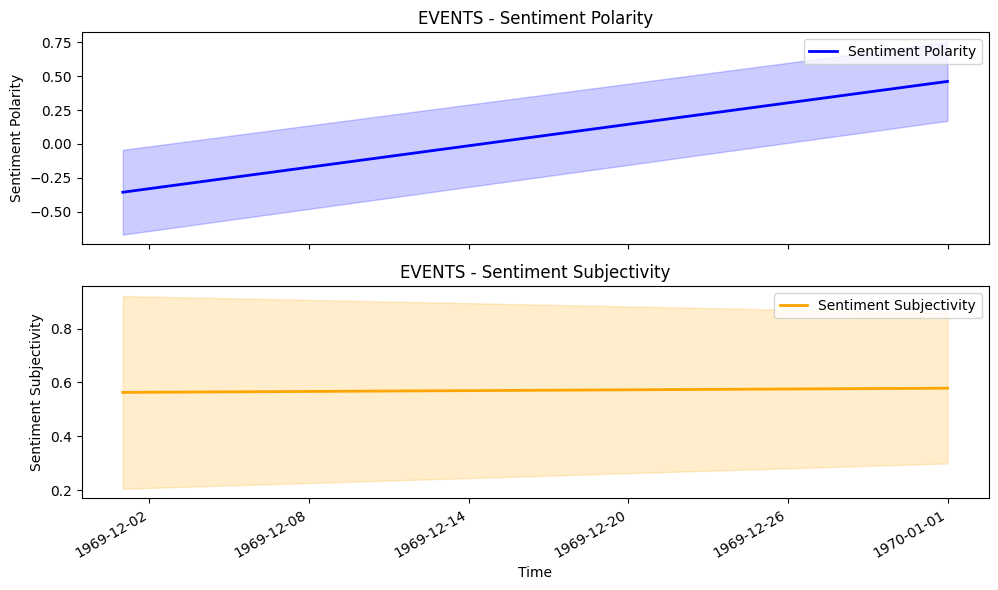

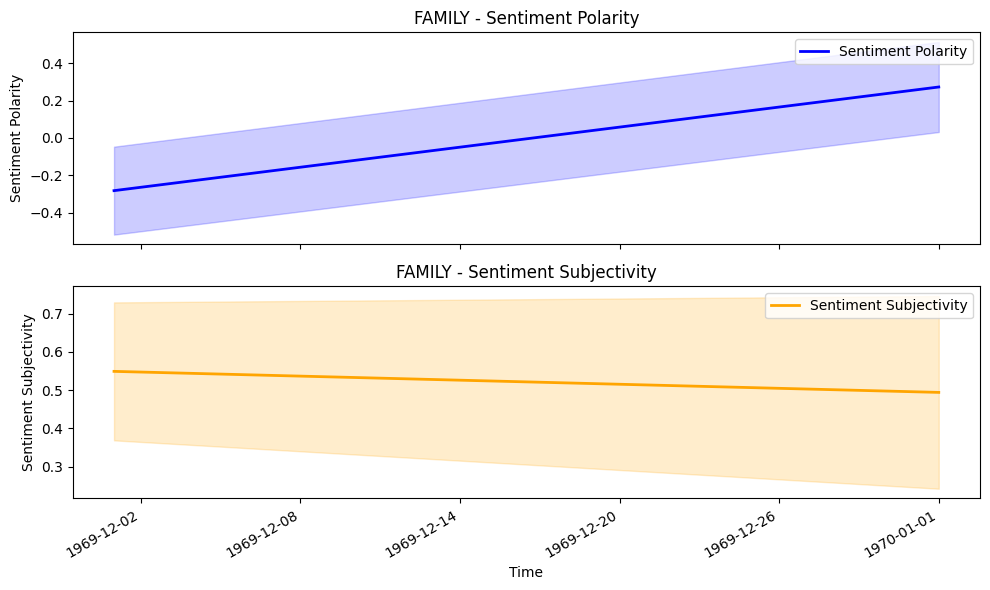

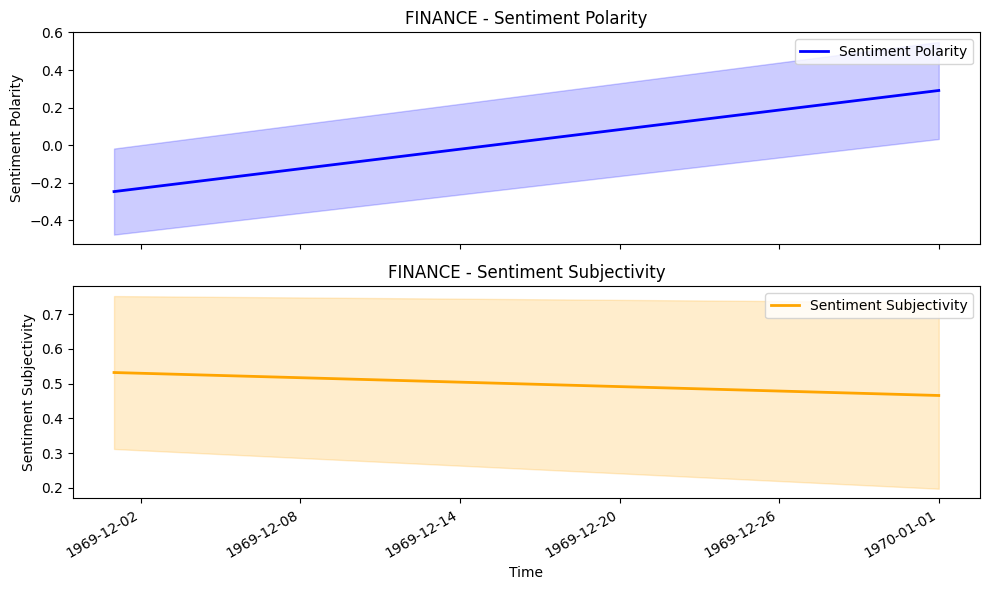

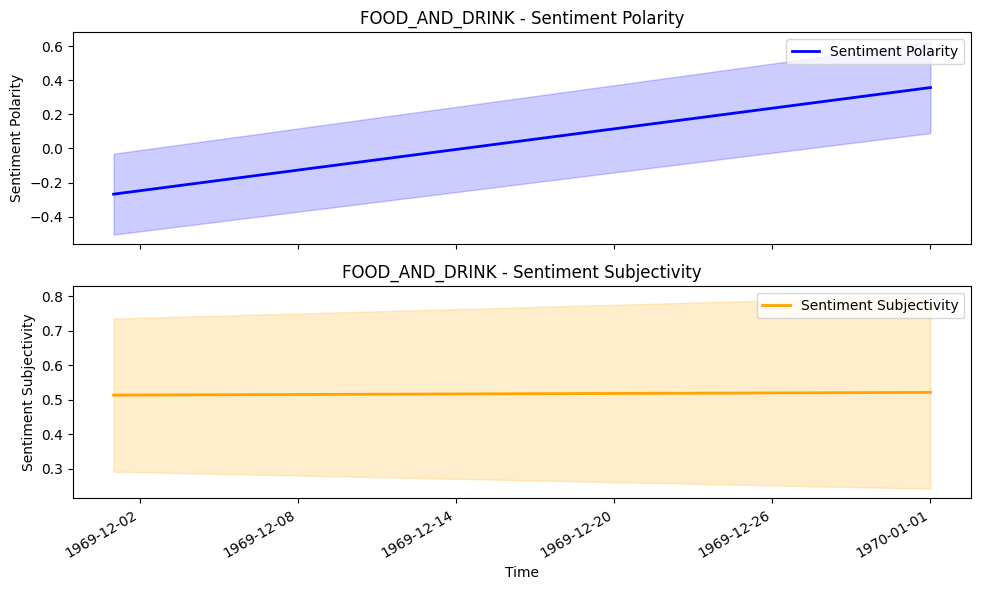

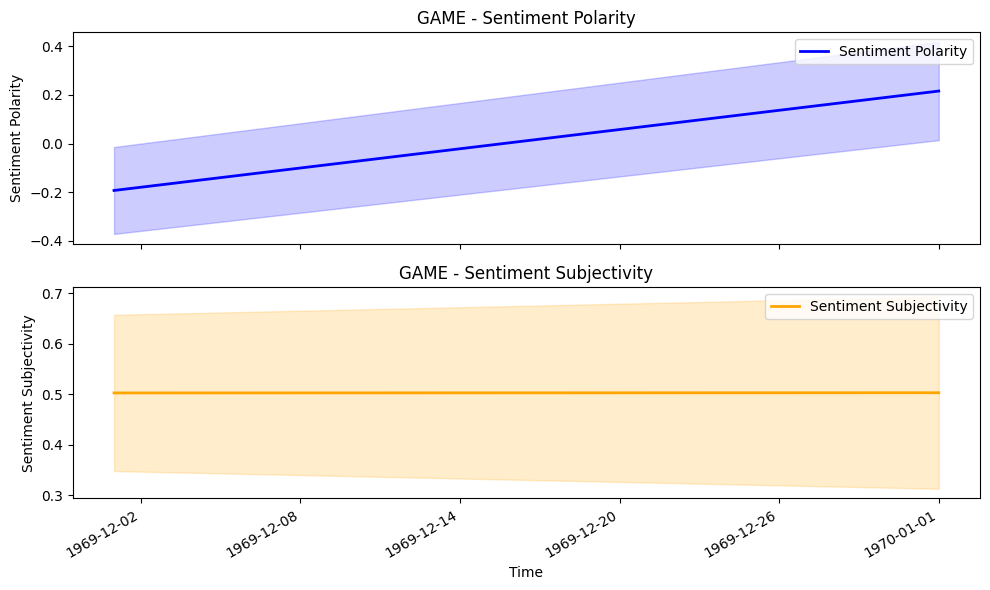

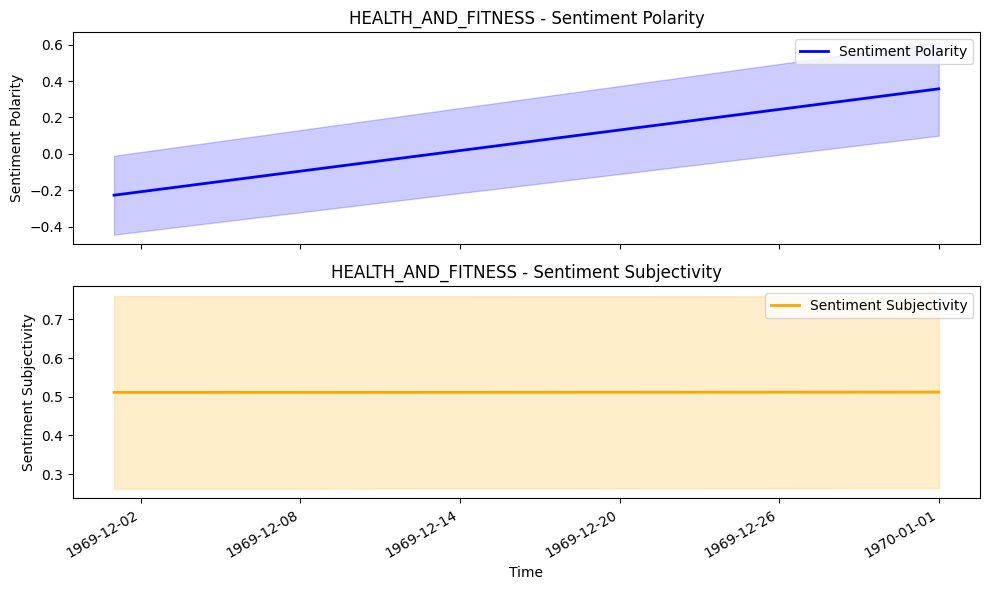

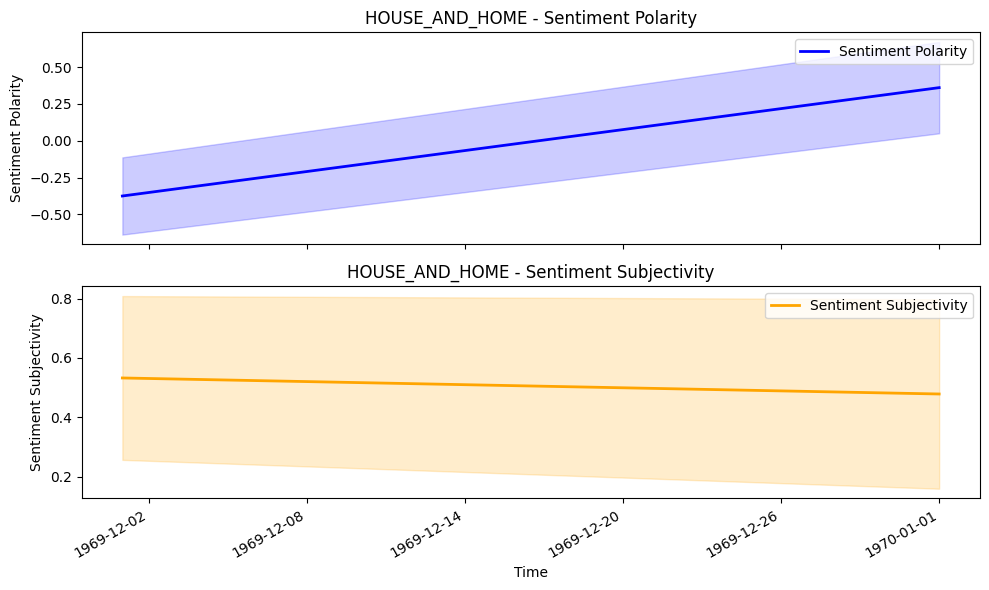

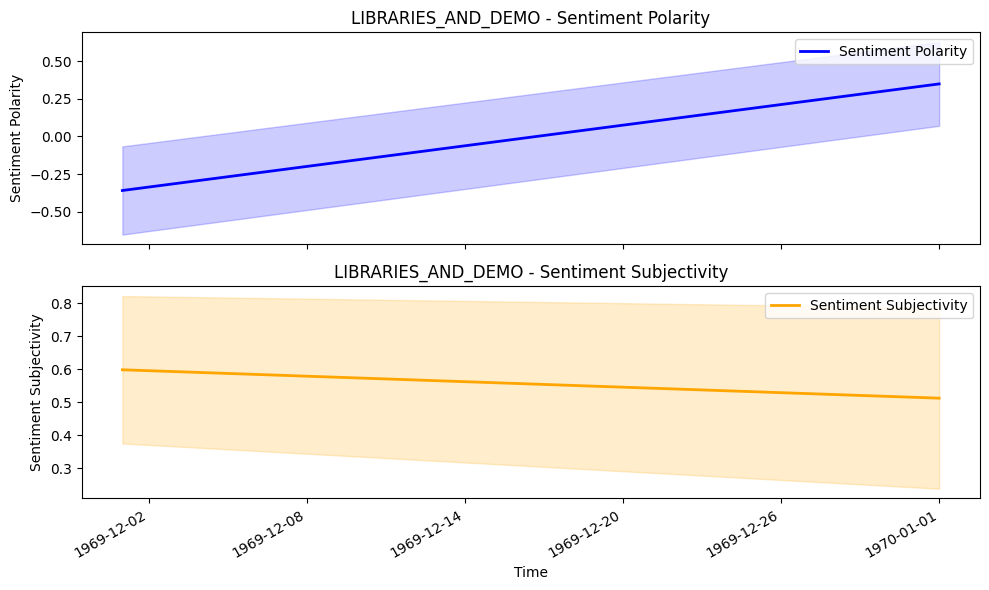

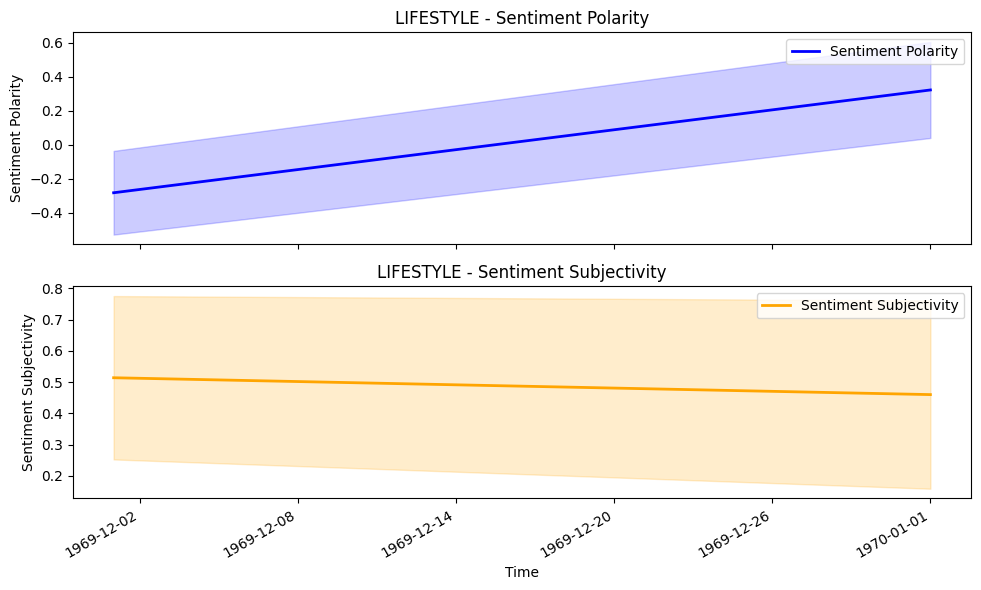

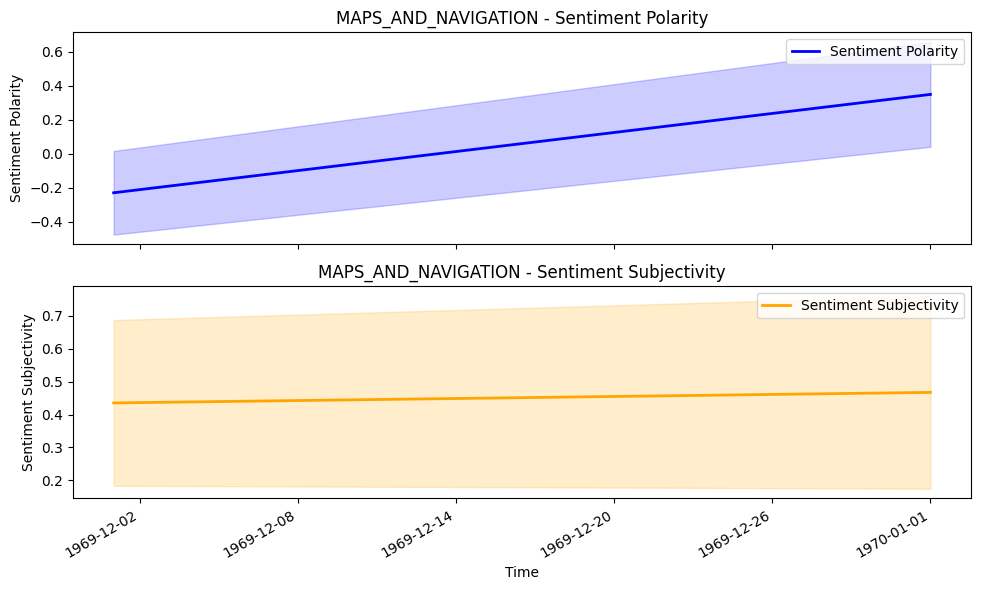

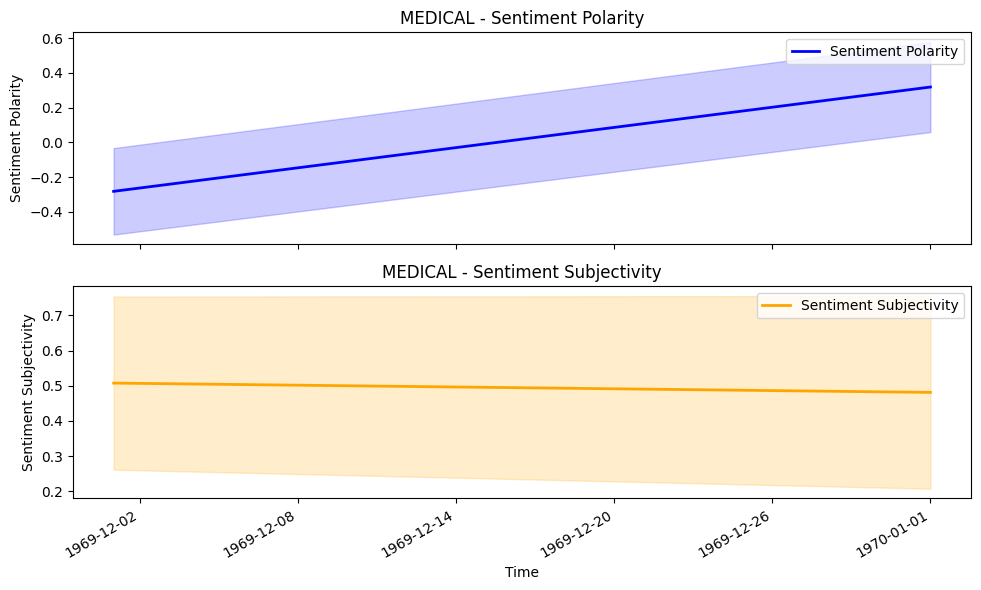

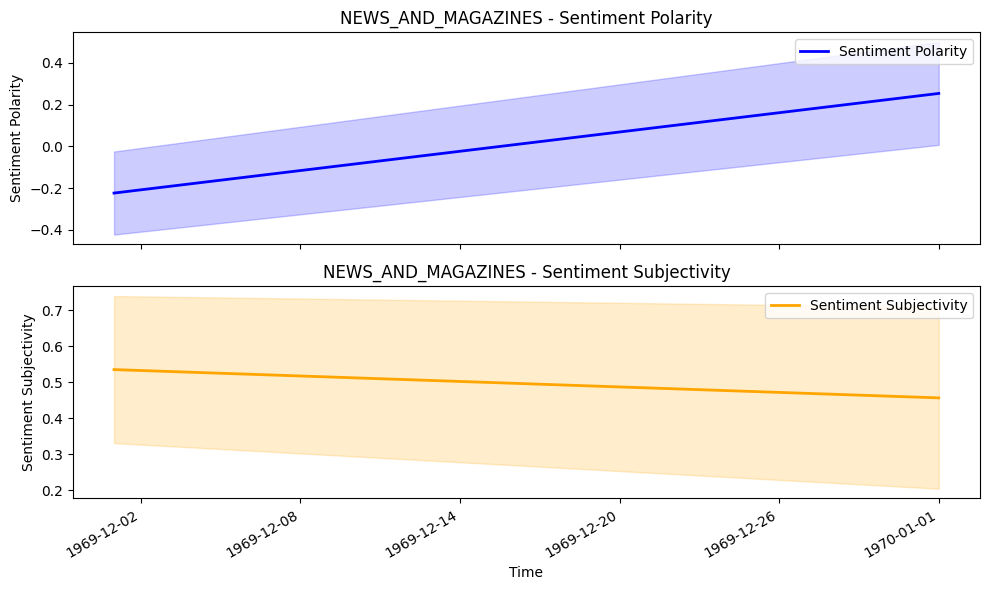

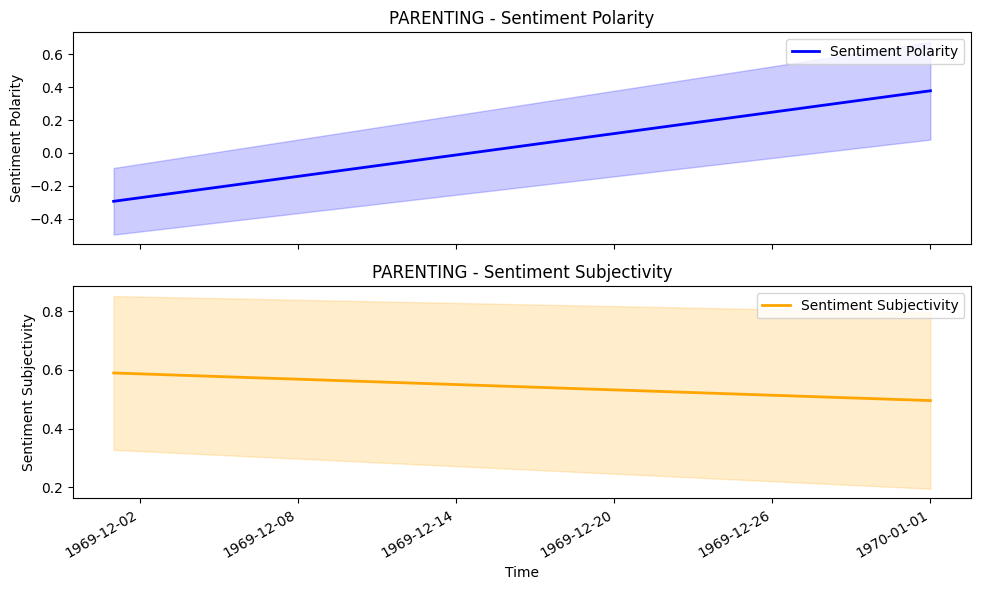

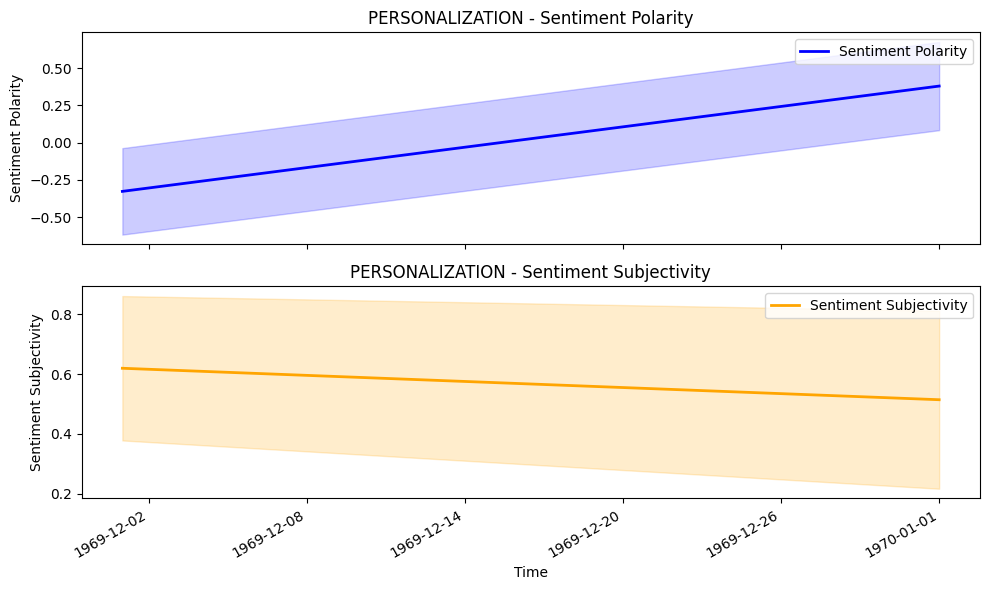

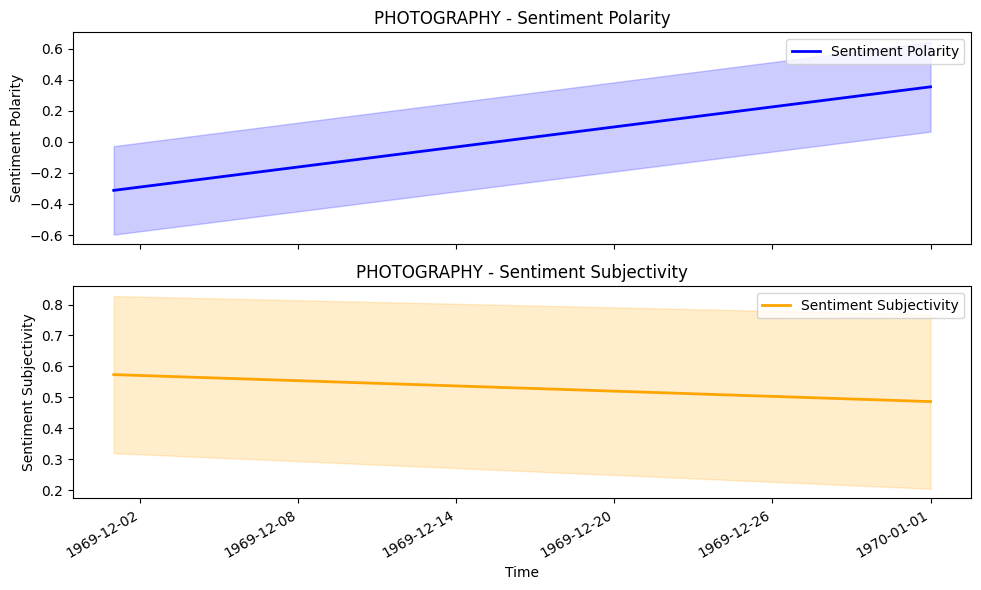

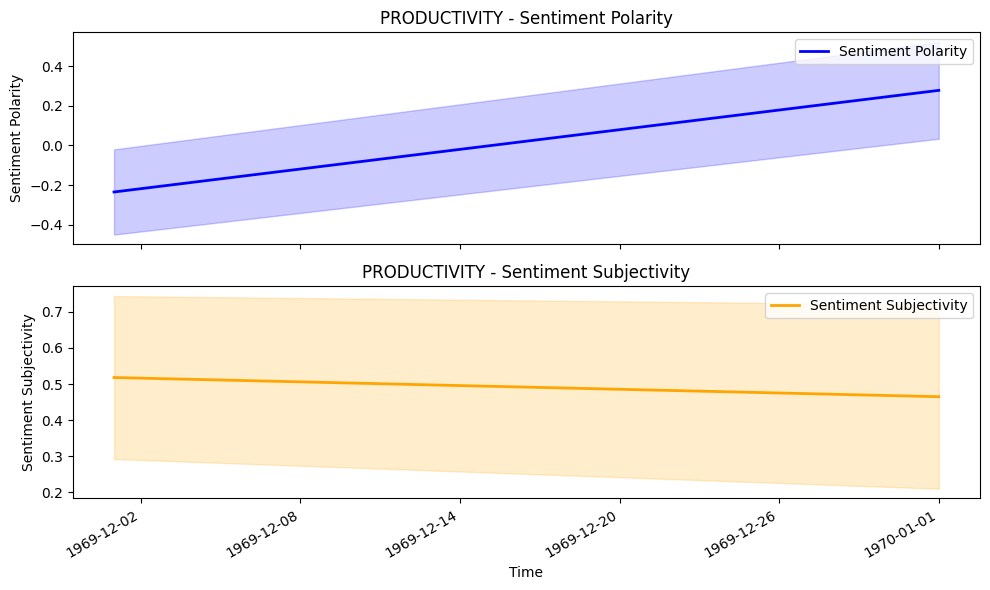

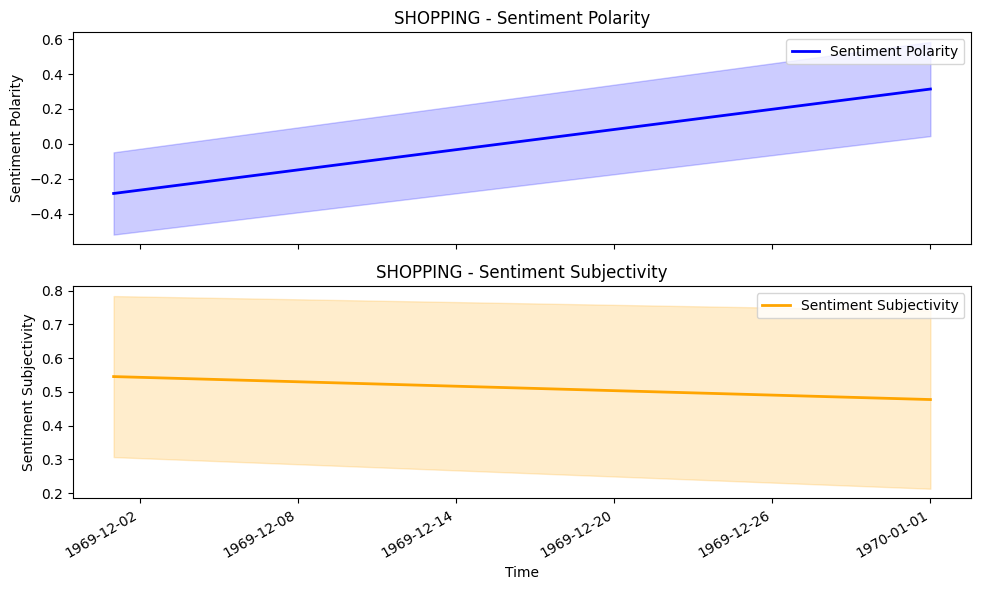

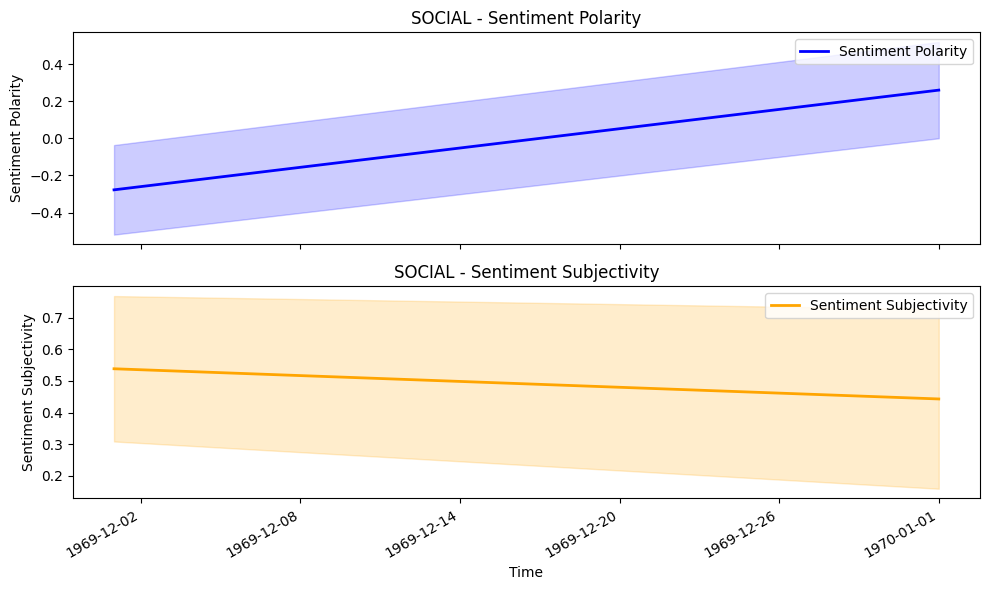

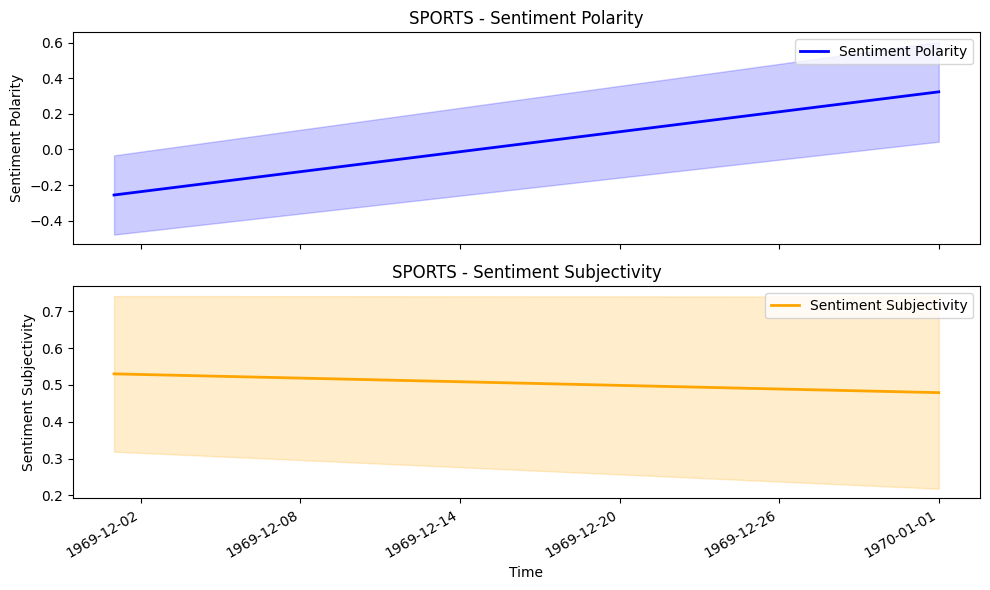

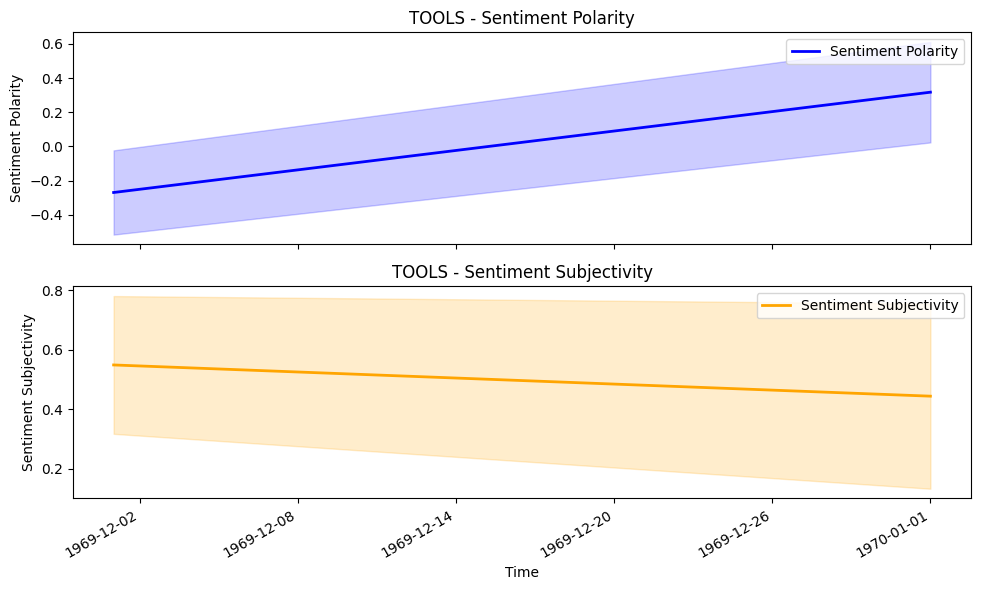

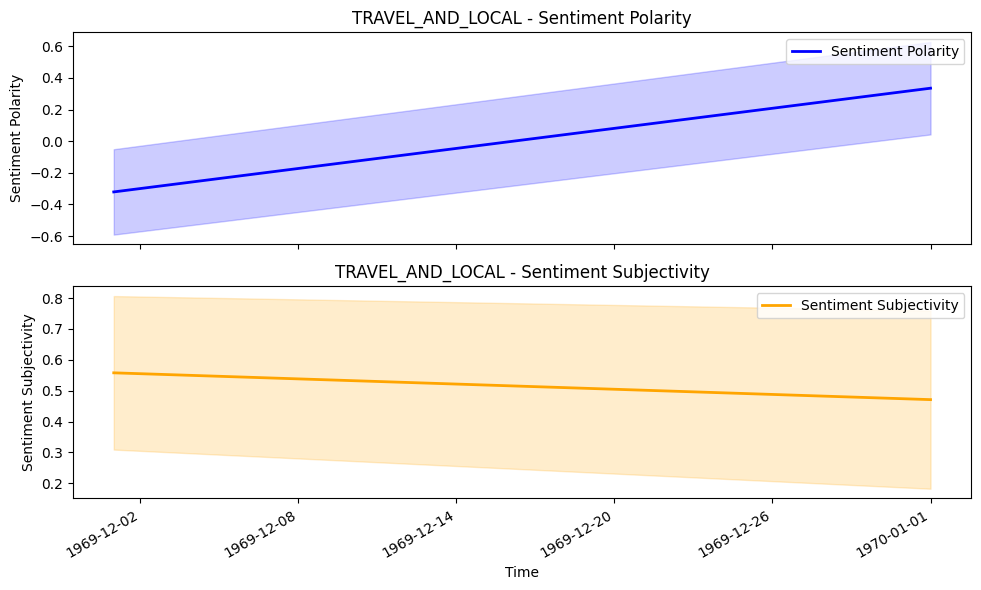

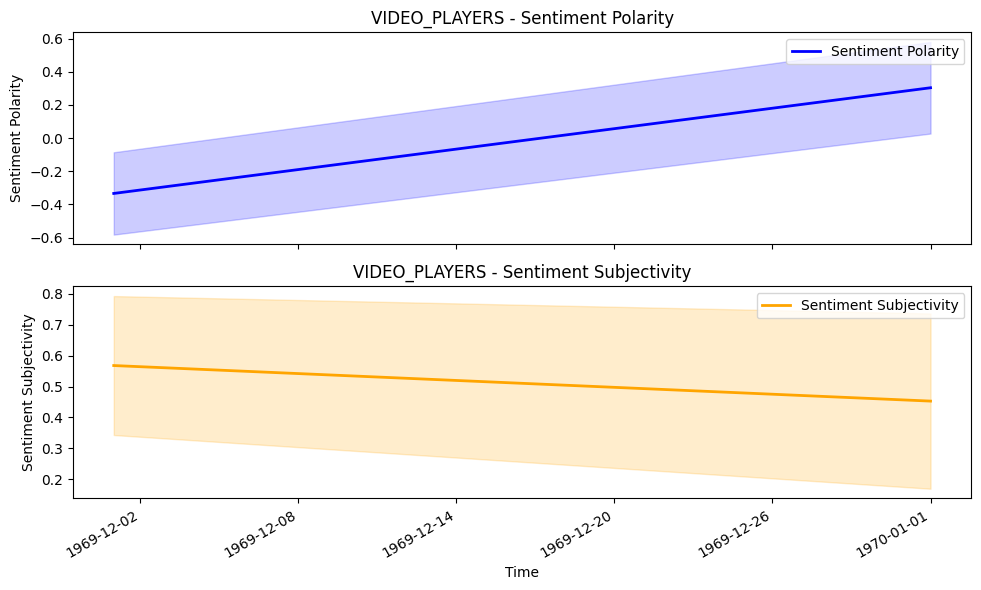

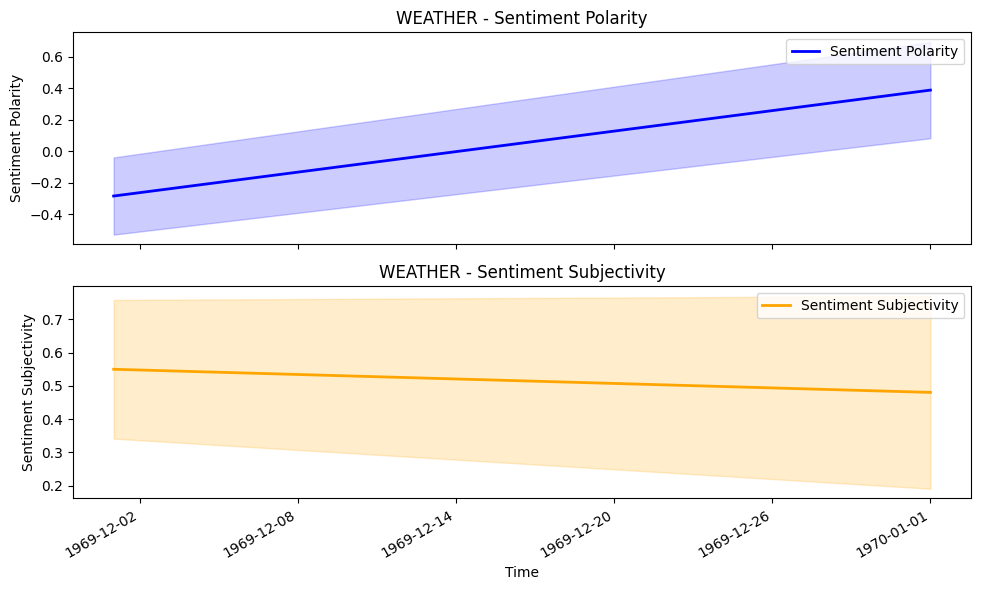

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets
apps_df = pd.read_csv("/content/sample_data/googleplaystore.csv")
reviews_df = pd.read_csv("/content/sample_data/googleplaystore_user_reviews.csv")


# Clean and preprocess the data
apps_df.drop_duplicates(subset="App", inplace=True)
apps_df = apps_df[apps_df["Rating"].notna()]
apps_df["Category"] = apps_df["Category"].astype("category")
reviews_df.dropna(subset=["Sentiment"], inplace=True)

# Merge the dataframes on app name
merged_df = pd.merge(apps_df, reviews_df, on="App", how="inner")

# Group the data by category and time to calculate average sentiment polarity and subjectivity
merged_df["Date"] = pd.to_datetime(merged_df["Sentiment_Polarity"], unit="s").dt.date
merged_df["Month"] = pd.to_datetime(merged_df["Sentiment_Polarity"], unit="s").dt.to_period("M")
grouped_df = merged_df.groupby(["Category", "Month"]).agg({"Sentiment_Polarity": ["mean", "std"], "Sentiment_Subjectivity": ["mean", "std"]})

# Plot the results
categories = grouped_df.index.levels[0]
for category in categories:
    fig, axs = plt.subplots(2, figsize=(10, 6))
    data = grouped_df.loc[category]
    axs[0].plot(data.index.to_timestamp(), data["Sentiment_Polarity"]["mean"], color='blue', linewidth=2, label='Sentiment Polarity')
    axs[0].fill_between(data.index.to_timestamp(), data["Sentiment_Polarity"]["mean"] - data["Sentiment_Polarity"]["std"], data["Sentiment_Polarity"]["mean"] + data["Sentiment_Polarity"]["std"], alpha=0.2, color='blue')
    axs[0].set_title(f"{category} - Sentiment Polarity")
    axs[0].set_ylabel("Sentiment Polarity")
    axs[1].plot(data.index.to_timestamp(), data["Sentiment_Subjectivity"]["mean"], color='orange', linewidth=2, label='Sentiment Subjectivity')
    axs[1].fill_between(data.index.to_timestamp(), data["Sentiment_Subjectivity"]["mean"] - data["Sentiment_Subjectivity"]["std"], data["Sentiment_Subjectivity"]["mean"] + data["Sentiment_Subjectivity"]["std"], alpha=0.2, color='orange')
    axs[1].set_title(f"{category} - Sentiment Subjectivity")
    axs[1].set_ylabel("Sentiment Subjectivity")
    fig.autofmt_xdate()
    axs[0].xaxis.set_major_locator(plt.MaxNLocator(6))
    axs[1].xaxis.set_major_locator(plt.MaxNLocator(6))
    axs[0].legend()
    axs[1].legend()
    plt.xlabel("Time")
    plt.tight_layout()
    plt.show()

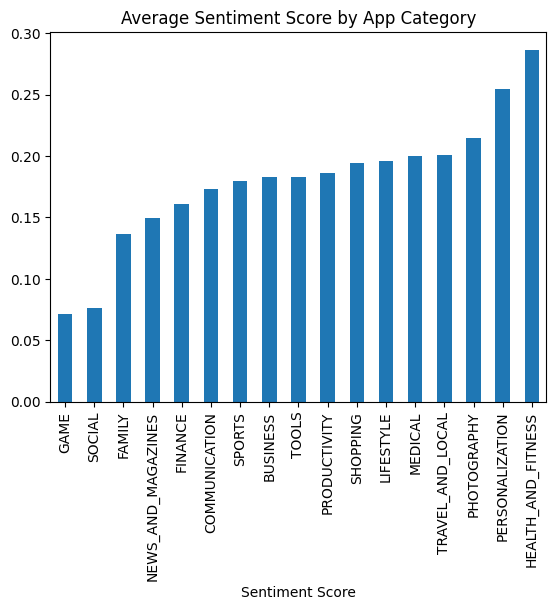

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
apps = pd.read_csv("/content/sample_data/googleplaystore.csv")
reviews = pd.read_csv("/content/sample_data/googleplaystore_user_reviews.csv")

# Remove missing and duplicate data
apps.dropna(inplace=True)
apps.drop_duplicates(inplace=True)
reviews.dropna(inplace=True)
reviews.drop_duplicates(inplace=True)

# Calculate the frequency of each category
category_frequency = apps['Category'].value_counts()

# Calculate the minimum frequency across categories
min_frequency = 200

# Filter categories with less than min_frequency records
valid_categories = category_frequency[category_frequency >= min_frequency].index
apps = apps[apps['Category'].isin(valid_categories)]

# Take a random sample of 42 records for each category
apps = apps.groupby('Category').apply(lambda x: x.sample(n=min_frequency))

# Merge the two datasets by app name
merged = pd.merge(apps, reviews, on='App')

# Calculate the average sentiment score for each category
category_sentiment = merged.groupby('Category')['Sentiment_Polarity'].mean().sort_values()

# Check that category_sentiment is not empty
if not category_sentiment.empty:
    # Plot the results
    category_sentiment.plot(kind='bar')
    plt.xlabel('Sentiment Score')
    plt.title('Average Sentiment Score by App Category')
    plt.show()
else:
    print("No categories with enough data.")
